In [1]:
# !git clone https://github.com/kairess/ACGPN.git
%cd ACGPN

/home/jykim/JY_project/Project/Fashine/ACGPN


In [2]:
# !pip install -U --no-cache-dir gdown --pre -qq
# !pip install ninja -qq

In [3]:
import gdown
import numpy as np  # numpy <= 1.23
from PIL import Image
import IPython
import gdown
import os
import sys
import time
from predict_pose import generate_pose_keypoints

In [4]:
# %cd Data_preprocessing
# os.mkdir("test_color")
# os.mkdir("test_colormask")
# os.mkdir("test_edge")
# os.mkdir("test_img")
# os.mkdir("test_label")
# os.mkdir("test_mask")
# os.mkdir("test_pose")

# %cd ..
# os.mkdir("inputs")
# os.mkdir("inputs/img")
# os.mkdir("inputs/cloth")

In [5]:
# !git clone https://github.com/levindabhi/Self-Correction-Human-Parsing-for-ACGPN.git
# !git clone https://github.com/levindabhi/U-2-Net.git

In [6]:
# !gdown 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko -O pose/pose_iter_440000.caffemodel

In [7]:
# gdown.download('https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH', 'lip_final.pth', quiet=False)

In [8]:
%cd U-2-Net
# os.mkdir('saved_models/u2net')
# os.mkdir('saved_models/u2netp')

# !gdown 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
# !gdown 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth

import u2net_load
import u2net_run

u2net = u2net_load.model(model_name='u2netp')

%cd ..

/home/jykim/JY_project/Project/Fashine/ACGPN/U-2-Net


/home/jykim/anaconda3/envs/DACON/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


...load U2NEP---4.7 MB
/home/jykim/JY_project/Project/Fashine/ACGPN


In [9]:
# os.mkdir('checkpoints')

# gdown.download('https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx', output='checkpoints/ACGPN_checkpoints.zip', quiet=False)
# !unzip checkpoints/ACGPN_checkpoints.zip -d checkpoints

# 전처리

## 옷 마스크 추출

In [10]:
data_path = 'inputs/cloth'

sorted(os.listdir(data_path))

['cloth01.jpg']

Generating mask for: cloth_1691129815.png
Saving output at Data_preprocessing/test_edge/cloth_1691129815.png
Generating mask for: cloth_1691128769.png
Saving output at Data_preprocessing/test_edge/cloth_1691128769.png
Generating mask for: cloth_1691128920.png
Saving output at Data_preprocessing/test_edge/cloth_1691128920.png
Generating mask for: cloth_1691057089.png
Saving output at Data_preprocessing/test_edge/cloth_1691057089.png
Generating mask for: cloth_1691112103.png
Saving output at Data_preprocessing/test_edge/cloth_1691112103.png
Generating mask for: cloth_1691128645.png
Saving output at Data_preprocessing/test_edge/cloth_1691128645.png
Generating mask for: cloth_1691128852.png
Saving output at Data_preprocessing/test_edge/cloth_1691128852.png
Generating mask for: cloth_1691129229.png
Saving output at Data_preprocessing/test_edge/cloth_1691129229.png
Generating mask for: cloth_1691641974.png
Saving output at Data_preprocessing/test_edge/cloth_1691641974.png
Generating mask for

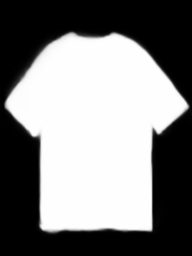

In [11]:
cloth_name = f'cloth_{int(time.time())}.png'

cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[0])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

Image.open(f'Data_preprocessing/test_edge/{cloth_name}')

## 모델 포즈, 세그멘테이션

In [12]:
sorted(os.listdir('inputs/img'))

['002699_0.jpg']

In [13]:
img_name = f'img_{int(time.time())}.png'

img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[0])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)

!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'

pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)

/home/jykim/anaconda3/envs/DACON/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
100%|█████████████████████████████████████████████| 9/9 [00:01<00:00,  7.89it/s]


[ WARN:0@8.650] global ocl4dnn_conv_spatial.cpp:1921 loadTunedConfig OpenCV(ocl4dnn): consider to specify kernel configuration cache directory through OPENCV_OCL4DNN_CONFIG_PATH parameter.
Could not open file: /tmp/dep-d50f22.d


OpenCL program build log: dnn/dummy
Status -11: CL_BUILD_PROGRAM_FAILURE
-cl-no-subgroup-ifp
Error in processing command line: Don't understand command line argument "-cl-no-subgroup-ifp"!
File saved at Data_preprocessing/test_pose/img_1691641976_keypoints.json


## 추론

In [14]:
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt', 'w') as f:
    f.write(f'{img_name} {cloth_name}')

In [15]:
!python test.py

?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
/home/jykim/anaconda3/envs/DACON/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Pyth

## 결과

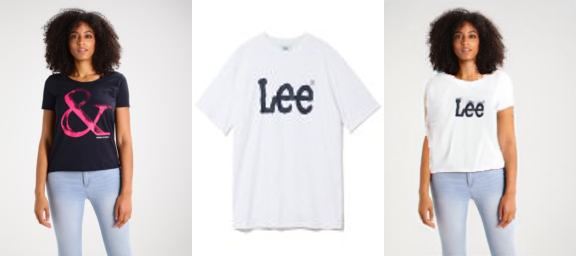

In [16]:
output_grid = np.concatenate([
    np.array(Image.open(f'Data_preprocessing/test_img/{img_name}')),
    np.array(Image.open(f'Data_preprocessing/test_color/{cloth_name}')),
    np.array(Image.open(f'results/test/try-on/{img_name}'))
], axis=1)

image_grid = Image.fromarray(output_grid)

image_grid